# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

/home/orion/.local/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 396740648
sectors = np.array([19])

period = 3.7701766063
tdepth = 0.0037505265767725404

lc = pd.read_csv("TOI_1694_19.csv", header=None)
contrastcurve_file = "TOI_1694_Ks_CC.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

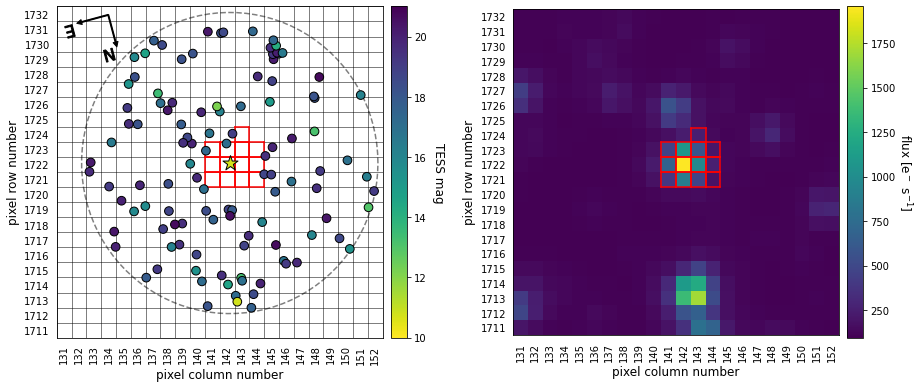

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,396740648,10.7424,9.957,9.473,9.425,97.748211,66.360683,0.845000,0.818330,5058.0,7.991820,0.000,0.000
1,396740644,17.0917,15.418,14.811,14.701,97.746469,66.353226,0.428933,0.433695,3379.0,1.880790,26.963,185.353
2,396776946,17.2693,16.343,15.740,15.611,97.766366,66.353834,0.780000,0.781313,4811.0,0.346678,35.986,133.244
3,705048925,18.9691,NaN,NaN,NaN,97.738805,66.350222,NaN,NaN,NaN,0.497528,40.034,199.835
4,705048928,19.6791,NaN,NaN,NaN,97.780705,66.362842,NaN,NaN,NaN,0.459126,47.543,80.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,705049352,19.0938,NaN,NaN,NaN,97.627053,66.385142,NaN,NaN,5984.0,-0.125661,195.732,296.790
108,396776978,17.7244,16.118,15.545,15.434,97.786078,66.308430,0.352015,0.365433,3500.0,1.704840,195.910,163.764
109,396776908,18.1556,16.525,15.880,15.362,97.801955,66.410835,NaN,NaN,3838.0,1.368760,196.478,23.208
110,396740669,15.4459,14.053,13.329,13.140,97.662289,66.403921,0.644199,0.673136,3571.0,2.002240,198.962,321.515


In [4]:
ap = np.array([ [141, 1721], [142, 1721], [143, 1721], [144, 1721], [141, 1722],
                [142, 1722], [143, 1722], [144, 1722], [141, 1723], [142, 1723],
                [143, 1723], [144, 1723], [143, 1724] ])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,396740648,10.7424,9.957,9.473,9.425,97.748211,66.360683,0.845000,0.818330,5058.0,7.991820,0.000,0.000,9.930394e-01,0.003777
1,396740644,17.0917,15.418,14.811,14.701,97.746469,66.353226,0.428933,0.433695,3379.0,1.880790,26.963,185.353,1.878913e-03,0.000000
2,396776946,17.2693,16.343,15.740,15.611,97.766366,66.353834,0.780000,0.781313,4811.0,0.346678,35.986,133.244,1.081168e-03,0.000000
3,705048925,18.9691,NaN,NaN,NaN,97.738805,66.350222,NaN,NaN,NaN,0.497528,40.034,199.835,2.199234e-04,0.000000
4,705048928,19.6791,NaN,NaN,NaN,97.780705,66.362842,NaN,NaN,NaN,0.459126,47.543,80.575,5.310020e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,705049352,19.0938,NaN,NaN,NaN,97.627053,66.385142,NaN,NaN,5984.0,-0.125661,195.732,296.790,3.882463e-27,0.000000
108,396776978,17.7244,16.118,15.545,15.434,97.786078,66.308430,0.352015,0.365433,3500.0,1.704840,195.910,163.764,5.828888e-28,0.000000
109,396776908,18.1556,16.525,15.880,15.362,97.801955,66.410835,NaN,NaN,3838.0,1.368760,196.478,23.208,1.894809e-29,0.000000
110,396740669,15.4459,14.053,13.329,13.140,97.662289,66.403921,0.644199,0.673136,3571.0,2.002240,198.962,321.515,1.955311e-24,0.000000


# Ploting CC File

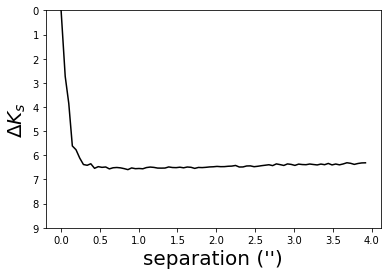

In [6]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [7]:
%%time

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.00138889)

Calculating TP scenario probabilitiey for 396740648.
Calculating EB and EBx2P scenario probabilities for 396740648.
Calculating PTP scenario probability for 396740648.
Calculating PEB and PEBx2P scenario probabilities for 396740648.
Calculating STP scenario probability for 396740648.
Calculating SEB and SEBx2P scenario probabilities for 396740648.
Calculating DTP scenario probability for 396740648.
Calculating DEB and DEBx2P scenario probabilities for 396740648.
Calculating BTP scenario probability for 396740648.
Calculating BEB and BEBx2P scenario probabilities for 396740648.
CPU times: user 24min 47s, sys: 1.5 s, total: 24min 48s
Wall time: 25min 21s


In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  3.4269279776122374e-06
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,396740648,TP,0.845000,0.818330,3.770177,89.473257,0.108758,0.093890,188.122951,5.493319,0.000000,0.000000,6.190281e-01
1,396740648,EB,0.845000,0.818330,3.770177,86.124687,0.339997,0.854331,203.621520,0.000000,0.105571,0.127862,4.473398e-130
2,396740648,EBx2P,0.845000,0.818330,7.540353,87.052334,0.533830,0.689050,164.229025,0.000000,0.826339,0.818330,1.162469e-33
3,396740648,PTP,0.845000,0.818330,3.770177,89.377530,0.118388,0.139495,154.664181,5.439214,0.000000,0.000000,1.177288e-03
4,396740648,PEB,0.845000,0.818330,3.770177,86.510972,0.662523,0.385451,185.943479,0.000000,0.111976,0.136548,4.462453e-193
5,396740648,PEBx2P,0.845000,0.818330,7.540353,87.286394,0.418541,0.759461,170.789196,0.000000,0.818005,0.818330,1.629092e-30
6,396740648,STP,0.754531,0.784524,3.770177,89.142070,0.163422,0.124467,147.401627,8.723195,0.000000,0.000000,2.787403e-13
7,396740648,SEB,0.560291,0.569013,3.770177,88.848426,0.314415,0.528790,212.309059,0.000000,0.097304,0.116087,3.230636e-06
8,396740648,SEBx2P,0.469819,0.468885,7.540353,88.235962,0.801350,0.623646,199.915412,0.000000,0.448970,0.447426,5.013132e-19
9,396740648,DTP,0.845000,0.818330,3.770177,89.143049,0.170605,0.109014,169.342968,5.925460,0.000000,0.000000,3.797912e-01


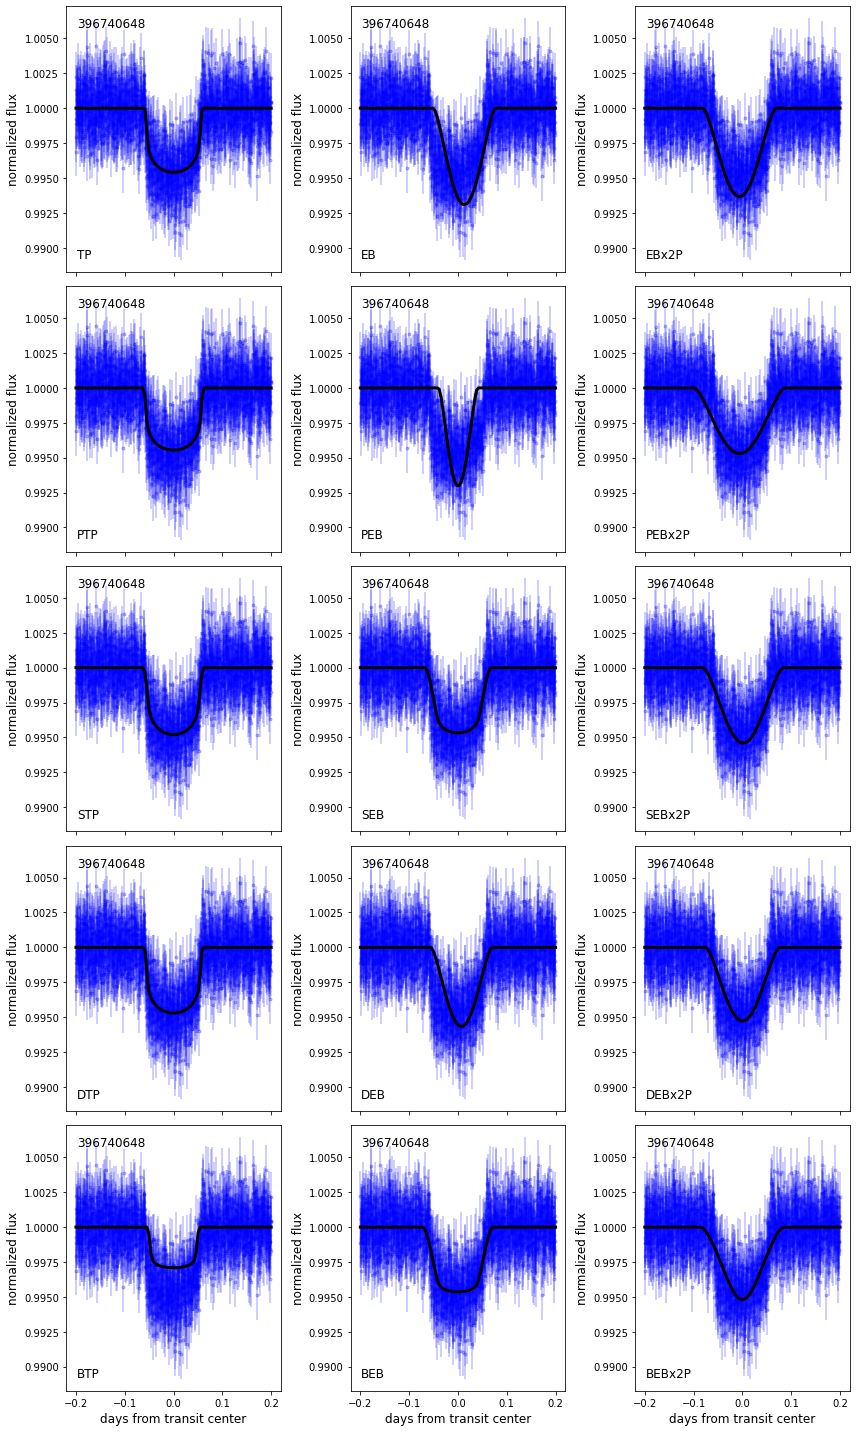

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [ ]:
%%time

FPPs = np.zeros(15)
NFPPs = np.zeros(15)
for i in range(15):
    target.calc_probs(time=lc.time.value, 
                      flux_0=lc.flux.value, 
                      flux_err_0=np.mean(lc.flux_err.value), 
                      P_orb=P_orb,
                      parallel=True,
                      verbose=1)
    #print(i)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    

meanFPP = np.round(np.mean(FPPs), 9)
stdvFPP = np.round(np.std(FPPs), 9)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.round(np.mean(NFPPs), 9)
stdvNFPP = np.round(np.std(NFPPs), 9)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

Calculating TP scenario probabilitiey for 396740648.
Calculating EB and EBx2P scenario probabilities for 396740648.
Calculating PTP scenario probability for 396740648.
Calculating PEB and PEBx2P scenario probabilities for 396740648.
Calculating STP scenario probability for 396740648.
Calculating SEB and SEBx2P scenario probabilities for 396740648.
Calculating DTP scenario probability for 396740648.
Calculating DEB and DEBx2P scenario probabilities for 396740648.
Calculating BTP scenario probability for 396740648.
Calculating BEB and BEBx2P scenario probabilities for 396740648.
Calculating TP scenario probabilitiey for 396740648.
Calculating EB and EBx2P scenario probabilities for 396740648.
Calculating PTP scenario probability for 396740648.
Calculating PEB and PEBx2P scenario probabilities for 396740648.
Calculating STP scenario probability for 396740648.
Calculating SEB and SEBx2P scenario probabilities for 396740648.
Calculating DTP scenario probability for 396740648.
Calculating DE